# 1. Importing necessary Libraries and the Dataset.

In [1]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 35kB/s 
     |████████████████████████████████| 491kB 58.8MB/s 
     |████████████████████████████████| 3.2MB 58.7MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


In [2]:
# This will prompt for authorization.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1 Importing necessary Libraries

In [3]:
# Import necessary Libraries

import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import keras
from keras import models
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Using TensorFlow backend.


## 1.2 Reading the data from a shared location in drive

In [0]:
# Reading data from Train and Test files

a=np.load("/content/drive/My Drive/Deep Learning Course 2020/classification data/Aug_PCB/s_x_train.npy")
b=np.load("/content/drive/My Drive/Deep Learning Course 2020/classification data/Aug_PCB/s_y_train.npy")


## 1.3 High level overview of data

In [0]:
print("Number of datapoints in training data : ",a.shape[0])
print("dimension of each image : ",a.shape[1:])

Number of datapoints in training data :  5040
dimension of each image :  (300, 300, 3)


In [0]:
positive_class = 0
neg_class = 0
for i in b:
  if i==0:
    neg_class = neg_class+1
  else:
    positive_class = positive_class+1

print("Number of negative class data points are : ",neg_class)
print("NUmber of positive class data points are : ",positive_class)

Number of negative class data points are :  2520
NUmber of positive class data points are :  2520


0.0


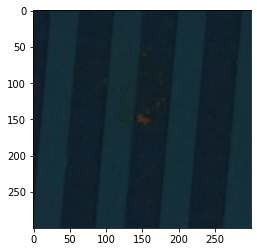

In [0]:
# view a sample image datapoint

plt.imshow(a[500], cmap='gray')
print(b[500])

# 2. Splitting the data into Train and Test and normalizing the pixel values


In [0]:
# train test split in scikit learn , test size = 30 percent

xtrain, xtest, ytrain, ytest = train_test_split(a, b, test_size=0.30, random_state=42)

In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

## 2.1 Data Normalization

In [6]:
#keras.utils.normalize(a, axis=-1, order=2)

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

1.0 1.0
0.0 0.0
1.0 1.0
0.0 0.0
0.20859058
0.20788237
3.807006 3.807006
-1.0034068 -1.0034068


In [0]:
xtrain = xtrain.reshape(xtrain.shape[0],300,300,3)
xtest =  xtest.reshape(xtest.shape[0],300,300,3)

## 2.2 One Hot encoding of class labels

In [8]:
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

[0. 1.]


# 3. CNN Model for classification of PCB Boards for Augumented Data

## 3.1 LeNet for Classification

### 3.1.1 LeNet Structure

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(6, (3,3), input_shape=(300,300,3), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 6)       168       
_________________________________________________________________
average_pooling2d_1 (Average (None, 149, 149, 6)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 145, 145, 16)      2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 72, 72, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               9953400   
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

### 3.1.2 Compiling and Training Model

In [0]:
# using Adam Optimizer and loss as cat crossentropy

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256, epochs=50, verbose=1)


Train on 2822 samples, validate on 706 samples
Epoch 1/50
2822/2822 [==============================] - 94s 33ms/step - loss: 0.6663 - accuracy: 0.6060 - val_loss: 0.7152 - val_accuracy: 0.5297
Epoch 2/50
2822/2822 [==============================] - 93s 33ms/step - loss: 0.6351 - accuracy: 0.6300 - val_loss: 0.6628 - val_accuracy: 0.5765
Epoch 3/50
2822/2822 [==============================] - 94s 33ms/step - loss: 0.5651 - accuracy: 0.7077 - val_loss: 0.5240 - val_accuracy: 0.7620
Epoch 4/50
2822/2822 [==============================] - 93s 33ms/step - loss: 0.4454 - accuracy: 0.8069 - val_loss: 0.8797 - val_accuracy: 0.5439
Epoch 5/50
2822/2822 [==============================] - 93s 33ms/step - loss: 0.4277 - accuracy: 0.8349 - val_loss: 1.3249 - val_accuracy: 0.5482
Epoch 6/50
2822/2822 [==============================] - 94s 33ms/step - loss: 0.5490 - accuracy: 0.7892 - val_loss: 0.7688 - val_accuracy: 0.6062
Epoch 7/50
2822/2822 [==============================] - 93s 33ms/step - loss

### 3.1.3 Results on Test data.

In [0]:
model.evaluate(xtest,ytest)

1512/1512 [==============================] - 22s 15ms/step


[0.5329912370218645, 0.8849206566810608]

In [0]:
pred=model.predict(xtest[0].reshape(1,300,300,3))
print(pred)
print(pred.argmax())

[[6.7450455e-05 9.9993253e-01]]
1


In [0]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

1512/1512 [==============================] - 19s 12ms/step
0.5329912370218645
0.8849206566810608


In [0]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

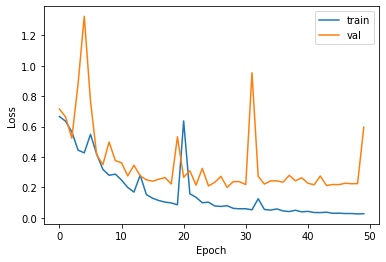

In [0]:

plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

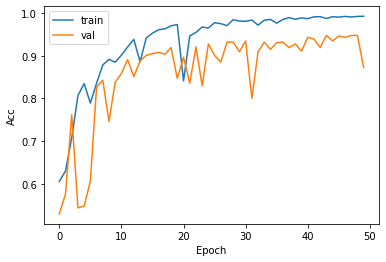

In [0]:

plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [0]:

for i in range(10):
    pred = model.predict(xtest[i].reshape(1, 300, 300, 3))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

1 Actual is  [0. 1.] Predicted is 1
2 Actual is  [0. 1.] Predicted is 0
3 Actual is  [1. 0.] Predicted is 0
4 Actual is  [0. 1.] Predicted is 1
5 Actual is  [0. 1.] Predicted is 1
6 Actual is  [0. 1.] Predicted is 1
7 Actual is  [1. 0.] Predicted is 0
8 Actual is  [0. 1.] Predicted is 1
9 Actual is  [0. 1.] Predicted is 0
10 Actual is  [1. 0.] Predicted is 0


### 3.1.4 F1 score and Confusion Matrix

In [0]:
Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.82      0.99      0.90       773
     class 1       0.99      0.77      0.87       739

    accuracy                           0.88      1512
   macro avg       0.90      0.88      0.88      1512
weighted avg       0.90      0.88      0.88      1512



In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[766   7]
 [167 572]]


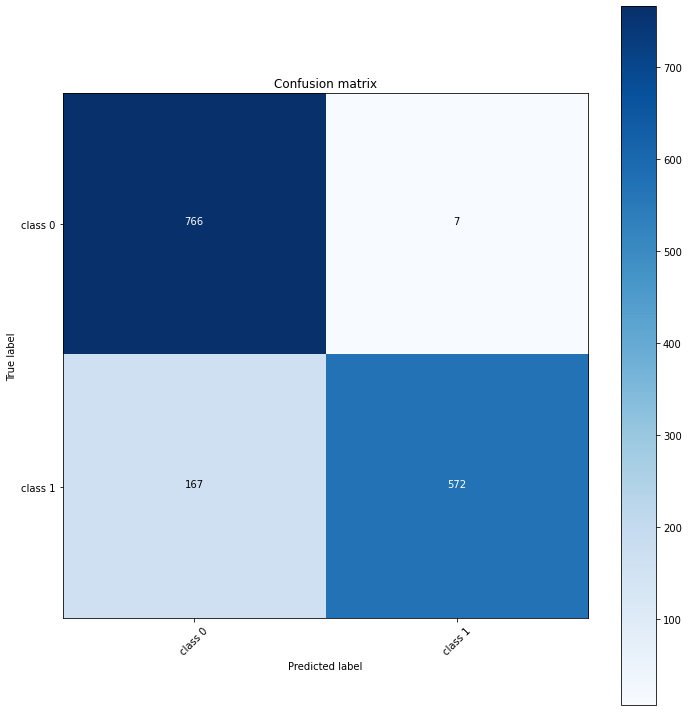

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

## 3.2 Modified LeNet (3 Concolutional-Max Pooling Layers)

### 3.2.1 Modified Structure

In [15]:
# Slight Modification of LeNet (1998) model with one extra convolutional layer before flattening

model = models.Sequential()

model.add(layers.Conv2D(6, (3,3), input_shape=(300,300,3), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 6)       168       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 6)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 145, 145, 16)      2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 72, 72, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 68, 68, 16)        6416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)           

### 3.2.2 Compiling and training the Model

In [22]:
# using Adam Optimizer and loss as cat crossentropy

model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256, epochs=50, verbose=1)


Train on 2822 samples, validate on 706 samples
Epoch 1/50
2822/2822 [==============================] - 115s 41ms/step - loss: 0.8327 - accuracy: 0.5354 - val_loss: 0.6014 - val_accuracy: 0.7153
Epoch 2/50
2822/2822 [==============================] - 115s 41ms/step - loss: 0.5100 - accuracy: 0.7307 - val_loss: 0.4278 - val_accuracy: 0.8102
Epoch 3/50
2822/2822 [==============================] - 115s 41ms/step - loss: 0.3502 - accuracy: 0.8529 - val_loss: 0.3283 - val_accuracy: 0.8725
Epoch 4/50
2822/2822 [==============================] - 115s 41ms/step - loss: 0.2344 - accuracy: 0.9086 - val_loss: 0.2807 - val_accuracy: 0.8909
Epoch 5/50
2822/2822 [==============================] - 116s 41ms/step - loss: 0.1604 - accuracy: 0.9352 - val_loss: 0.3047 - val_accuracy: 0.9150
Epoch 6/50
2822/2822 [==============================] - 116s 41ms/step - loss: 0.1096 - accuracy: 0.9642 - val_loss: 0.2760 - val_accuracy: 0.9178
Epoch 7/50
2822/2822 [==============================] - 116s 41ms/step

### 3.2.3 Results on Test Data

In [23]:
model.evaluate(xtest,ytest)

1512/1512 [==============================] - 22s 14ms/step


[0.3783596193414788, 0.9589946866035461]

In [24]:
pred=model.predict(xtest[0].reshape(1,300,300,3))
print(pred)
print(pred.argmax())

[[2.4584218e-10 1.0000000e+00]]
1


In [26]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

1512/1512 [==============================] - 21s 14ms/step
0.3783596193414788
0.9589946866035461


In [0]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

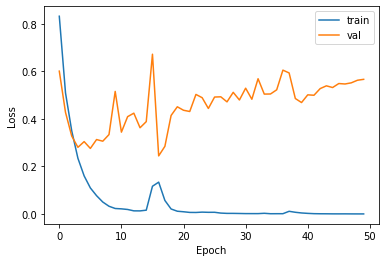

In [29]:

plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

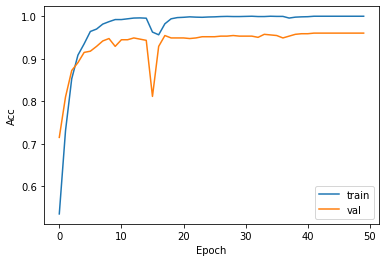

In [30]:

plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [31]:

for i in range(10):
    pred = model.predict(xtest[i].reshape(1, 300, 300, 3))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

1 Actual is  [0. 1.] Predicted is 1
2 Actual is  [0. 1.] Predicted is 1
3 Actual is  [1. 0.] Predicted is 1
4 Actual is  [0. 1.] Predicted is 1
5 Actual is  [0. 1.] Predicted is 1
6 Actual is  [0. 1.] Predicted is 1
7 Actual is  [1. 0.] Predicted is 0
8 Actual is  [0. 1.] Predicted is 1
9 Actual is  [0. 1.] Predicted is 0
10 Actual is  [1. 0.] Predicted is 0


### 3.2.4 F1 Score and Confusion Matrix

In [32]:

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.98      0.96       773
     class 1       0.98      0.94      0.96       739

    accuracy                           0.96      1512
   macro avg       0.96      0.96      0.96      1512
weighted avg       0.96      0.96      0.96      1512



In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[758  15]
 [ 47 692]]


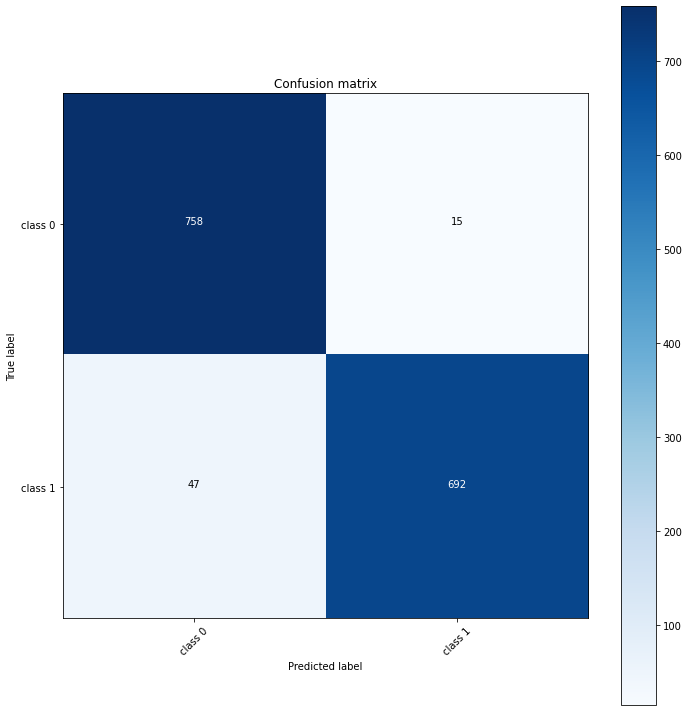

In [34]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

## 3.3 4-Convolutional Layers with Max-Pooling(5X5) and 2 Dense Layers 

### 3.3.1 Model Structure

In [37]:
model = models.Sequential()

model.add(layers.Conv2D(16, (3,3), input_shape=(300,300,3), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(layers.Conv2D(32, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(layers.Conv2D(32, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(layers.Conv2D(32, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))


model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 148, 148, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 144, 144, 32)      12832     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 71, 71, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 67, 67, 32)        25632     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 29, 29, 32)       

### 3.3.2 Compiling and training the Model

In [25]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256, epochs=50, verbose=1)

Train on 2822 samples, validate on 706 samples
Epoch 1/50
2822/2822 [==============================] - 11s 4ms/step - loss: 0.7177 - accuracy: 0.5985 - val_loss: 0.6454 - val_accuracy: 0.6926
Epoch 2/50
2822/2822 [==============================] - 10s 4ms/step - loss: 0.5568 - accuracy: 0.7275 - val_loss: 0.6342 - val_accuracy: 0.6983
Epoch 3/50
2822/2822 [==============================] - 10s 4ms/step - loss: 0.5504 - accuracy: 0.7551 - val_loss: 0.4637 - val_accuracy: 0.8102
Epoch 4/50
2822/2822 [==============================] - 10s 4ms/step - loss: 0.4342 - accuracy: 0.8349 - val_loss: 0.4217 - val_accuracy: 0.7932
Epoch 5/50
2822/2822 [==============================] - 10s 4ms/step - loss: 0.4081 - accuracy: 0.8278 - val_loss: 0.3326 - val_accuracy: 0.8654
Epoch 6/50
2822/2822 [==============================] - 10s 4ms/step - loss: 0.3100 - accuracy: 0.8721 - val_loss: 0.2891 - val_accuracy: 0.8810
Epoch 7/50
2822/2822 [==============================] - 10s 4ms/step - loss: 0.2668

### 3.3.3 Results on Test Data

In [26]:
model.evaluate(xtest,ytest)

1512/1512 [==============================] - 3s 2ms/step


[0.13986832409660258, 0.9794973731040955]

In [27]:
pred=model.predict(xtest[0].reshape(1,300,300,3))
print(pred)
print(pred.argmax())

[[1.2356151e-11 1.0000000e+00]]
1


In [28]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

1512/1512 [==============================] - 3s 2ms/step
0.13986832409660258
0.9794973731040955


In [0]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

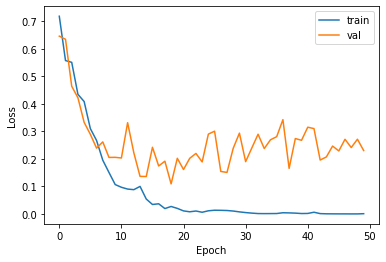

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

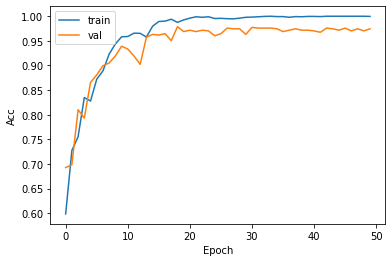

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [32]:
%matplotlib inline
for i in range(10):
    pred = model.predict(xtest[i].reshape(1, 300, 300, 3))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

1 Actual is  [0. 1.] Predicted is 1
2 Actual is  [0. 1.] Predicted is 0
3 Actual is  [1. 0.] Predicted is 0
4 Actual is  [0. 1.] Predicted is 1
5 Actual is  [0. 1.] Predicted is 1
6 Actual is  [0. 1.] Predicted is 1
7 Actual is  [1. 0.] Predicted is 0
8 Actual is  [0. 1.] Predicted is 1
9 Actual is  [0. 1.] Predicted is 1
10 Actual is  [1. 0.] Predicted is 0


### 3.3.4 F1 Score and Confusion Matrix

In [33]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98       773
     class 1       1.00      0.96      0.98       739

    accuracy                           0.98      1512
   macro avg       0.98      0.98      0.98      1512
weighted avg       0.98      0.98      0.98      1512



Confusion matrix, without normalization
[[770   3]
 [ 28 711]]


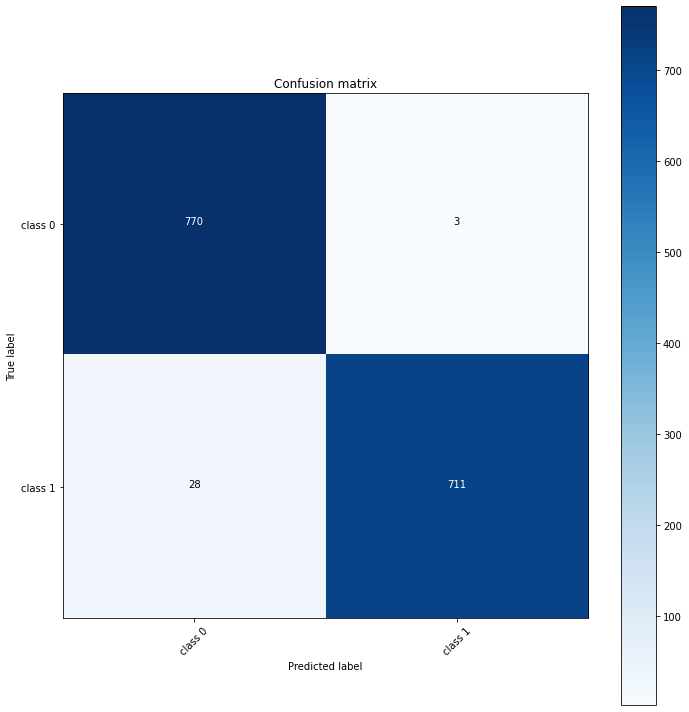

In [35]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

# 4. Summary

In [68]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model","Optimizer","Val loss","test loss","Val Accuracy","test accuracy","F1 score(class 0)","F1 score(class 1)"]
x.add_row(["LeNet","SGD","0.56","0.37","0.87","0.88","0.90","0.87"])
x.add_row(["Modified LeNet","ADAM","0.59","0.53","0.9603","0.9589","0.96","0.96"])
x.add_row(["4 ConV + MaxPool Model","ADAM","0.23","0.13","0.9745","0.9794","0.98","0.98"])

print(x)

+------------------------+-----------+----------+-----------+--------------+---------------+-------------------+-------------------+
|         Model          | Optimizer | Val loss | test loss | Val Accuracy | test accuracy | F1 score(class 0) | F1 score(class 1) |
+------------------------+-----------+----------+-----------+--------------+---------------+-------------------+-------------------+
|         LeNet          |    SGD    |   0.56   |    0.37   |     0.87     |      0.88     |        0.90       |        0.87       |
|     Modified LeNet     |    ADAM   |   0.59   |    0.53   |    0.9603    |     0.9589    |        0.96       |        0.96       |
| 4 ConV + MaxPool Model |    ADAM   |   0.23   |    0.13   |    0.9745    |     0.9794    |        0.98       |        0.98       |
+------------------------+-----------+----------+-----------+--------------+---------------+-------------------+-------------------+
